In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
# Drop the redundant column
df = df.drop(columns=['Unnamed: 0'])

# Check for missing values
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [6]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


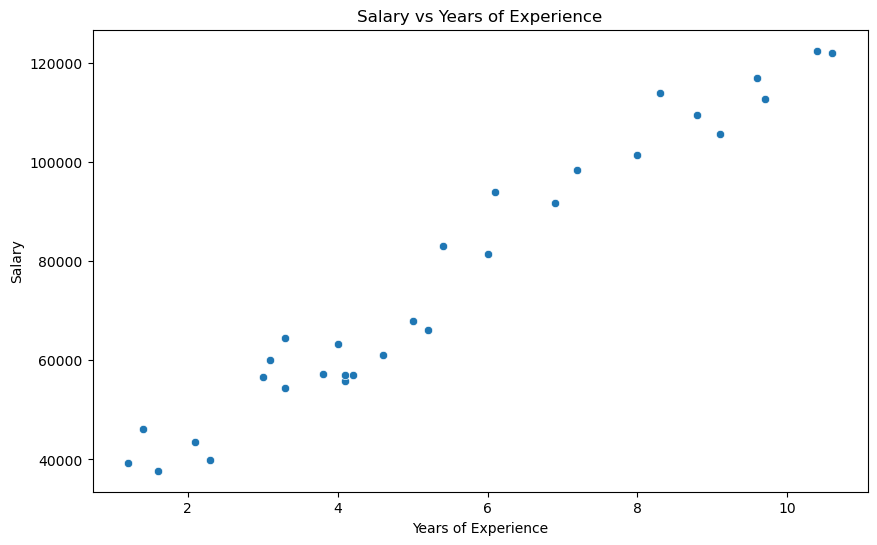


Descriptive Statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000

Correlation between Years of Experience and Salary: 0.98


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Calculate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Calculate the correlation between Years of Experience and Salary
correlation = df['YearsExperience'].corr(df['Salary'])
print(f"\nCorrelation between Years of Experience and Salary: {correlation:.2f}")

### analysis
The scatter plot reveals a strong positive linear relationship between years of experience and salary, suggesting that as experience increases, salary tends to increase as well. This linear pattern indicates that a linear regression model could be appropriate for our prediction task.
The correlation coefficient of approximately 0.98 confirms this strong positive relationship, as it's very close to 1. This high correlation suggests that years of experience is indeed a good predictor for salary in this dataset.
Looking at the descriptive statistics:

The years of experience in our dataset ranges from approximately 1.1 to 10.5 years
The average experience is around 5.3 years
Salaries range from approximately 37,000 to 122,000
The average salary is approximately 76,000

This initial analysis suggests that our data is well-suited for a linear regression model, as we have:

A clear linear relationship
No obvious outliers
A continuous target variable (salary)

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df[['YearsExperience']]
y = df['Salary']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 21
Testing set size: 9


In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Model Equation: Salary = {slope:.2f} * YearsExperience + {intercept:.2f}")

Model Equation: Salary = 9339.08 * YearsExperience + 24985.53


In [10]:
X.shape, X_train.shape, X_test.shape

((30, 1), (21, 1), (9, 1))

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict salaries for the test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Test Set Metrics:")
print(f"- R-squared (R²): {r2:.3f}")
print(f"- Mean Absolute Error (MAE): ${mae:.2f}")
print(f"- Root Mean Squared Error (RMSE): ${rmse:.2f}")

Test Set Metrics:
- R-squared (R²): 0.941
- Mean Absolute Error (MAE): $5161.33
- Root Mean Squared Error (RMSE): $6146.92


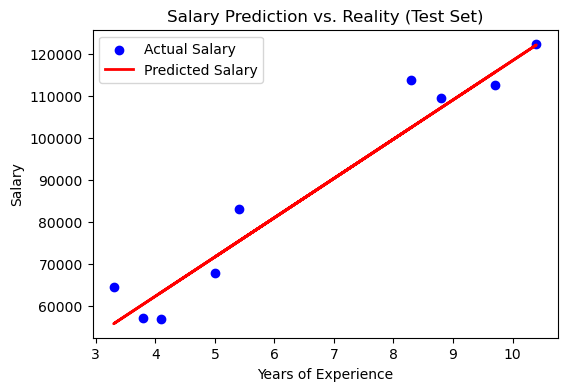

In [12]:
# Plot regression line and test data
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary')
plt.title('Salary Prediction vs. Reality (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [14]:
# Convert input to a DataFrame with the correct feature name
import pandas as pd
experience = pd.DataFrame({'YearsExperience': [5.0]})  # <-- Fix here
predicted_salary = model.predict(experience)
print(f"Predicted Salary: ${predicted_salary[0]:.2f}")

Predicted Salary: $71680.94
